<!-- metadata: title -->
# Kenya Population from year 1974 to year 2022

<!-- metadata: subtitle -->
> ### An animated plot of the Kenya population increase.

## Imports

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
import requests
from IPython.display import HTML
from matplotlib.colors import LinearSegmentedColormap

## Data and plot

The data has been sourced from the World Bank API.^[[World Bank API -JSON](http://api.worldbank.org/v2/countries/KEN/indicators/SP.POP.TOTL?format=json)]

In [25]:
# Fetch population data for Kenya from the World Bank API
url = 'http://api.worldbank.org/v2/countries/KEN/indicators/SP.POP.TOTL?format=json'

# Send a GET request to the World Bank API
json = requests.get(url).json()[1]

# Extract the JSON data, rename and sort
data = pd.DataFrame(json, columns=['date', 'value'])\
    .rename(columns={'date': 'Year', 'value': 'Population'})\
    .sort_values(by='Year', ascending=True)\
    .reset_index(drop=True)
data

,Year,Population
0,1974,13203949.0
1,1975,13651908.0
2,1976,14102268.0
3,1977,14577346.0
4,1978,15087423.0
5,1979,15620613.0
6,1980,16187124.0
7,1981,16785962.0
8,1982,17411491.0
9,1983,18069461.0


In [129]:
data.dropna(inplace=True)
data['Year'] = data['Year'].astype(int)

populations = data['Population'] / 10**6  # Convert population to millions
years = data['Year']

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_xlabel('Year')
ax.set_ylabel('Population (Million)')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines

# Create a line object
line, = ax.plot([], [], lw=3, color='blue')

# Define a colormap for the gradient
cmap = LinearSegmentedColormap.from_list('custom', ['green', 'yellow', 'red'])

# Function to update the animation frame
def animate(i):
    year = data['Year'].min() + i
    line.set_data(years[:i+1], populations[:i+1])

    # Map the current year to a color from the colormap
    color = cmap((year - years.min()) / (years.max() - years.min()))
    line.set_color(color)

    ax.set_xlim(years.min(), years.max())
    ax.set_ylim(0, populations.max() * 1.1)
    ax.set_title(f'Kenya Population ({year} - {populations[i]:.2f}M)')

    if i > 6:
        ax.texts[-1].remove()
    if i > 5:
        text_x = years[i]  # X coordinate of the text
        text_y = populations[i]  # Y coordinate of the text
        text = f'({text_x}, {text_y:.2f}M)'  # Text to display
        ax.text(text_x - 5, text_y - 6, text, ha='left', va='bottom', 
                fontsize=12, color='blue', alpha=0.8, rotation=30)

    return line,

# Create the animation
ani = animation.FuncAnimation(fig, animate, frames=len(data), interval=200, blit=True, repeat=False)
fig.suptitle(f"Kenyan Population, Year {data.loc[0, 'Year']} to Year {int(data.iloc[-1]['Year'])}")

# Add a watermark to the center of the plot
ax.text(0.95, 0.02, 'ToKnow.ai', ha='right', va='bottom', 
        fontsize=18, color='gray', alpha=0.5, transform=ax.transAxes, rotation=45)

# Display the animation
plt.close(ani._fig)

## Video

In [130]:
#| video-src: "https://www.youtube.com/watch?v=kCc8FmEb1nY"

HTML(f'<div class="ratio ratio-16x9">{ani.to_html5_video()}</div>')

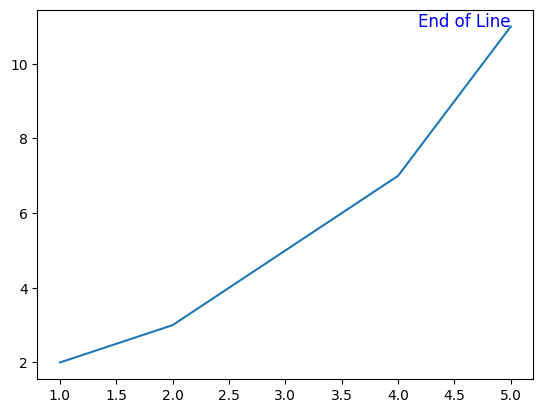

In [90]:
import matplotlib.pyplot as plt

# Create some sample data
x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

# Create a subplot
fig, ax = plt.subplots()

# Plot the data
line, = ax.plot(x, y)

# Get the last coordinates of the line plot
last_x, last_y = line.get_data()

# Add text at the tip of the line plot
ax.text(last_x[-1], last_y[-1], 'End of Line', fontsize=12, color='blue', horizontalalignment='right')

# Show the plot
plt.show()


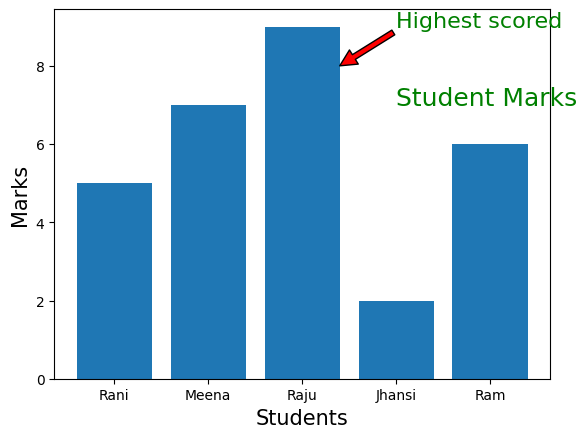

In [101]:
import matplotlib.pyplot as plt
import numpy as np

x = ['Rani', 'Meena', 'Raju', 'Jhansi', 'Ram']
y = [5, 7, 9, 2, 6]

plt.bar(x,y)

plt.text(3, 7, 'Student Marks', 
		fontsize = 18, color = 'g')

plt.xlabel('Students', fontsize = 15)
plt.ylabel('Marks', fontsize = 15)

plt.annotate('Highest scored', xy = (2.4, 8), 
			fontsize = 16, xytext = (3, 9), 
			arrowprops = dict(facecolor = 'red'),
			color = 'g')

plt.show()
